In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df=pd.read_csv("customer_booking.csv",encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping={
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7
}
df['flight_day']=df['flight_day'].map(mapping)

In [ ]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.drop(columns=["route","booking_origin"],inplace=True)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])

In [ ]:
X=df.drop(columns=["booking_complete"])
y=df["booking_complete"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Cross-Validation Mean Accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.43      0.06      0.11      1480

    accuracy                           0.85     10000
   macro avg       0.64      0.52      0.51     10000
weighted avg       0.79      0.85      0.80     10000

Confusion Matrix:
[[8402  118]
 [1391   89]]
Cross-Validation Accuracy Scores: [0.8491 0.8473 0.8475 0.8495 0.8477]
Cross-Validation Mean Accuracy: 0.85


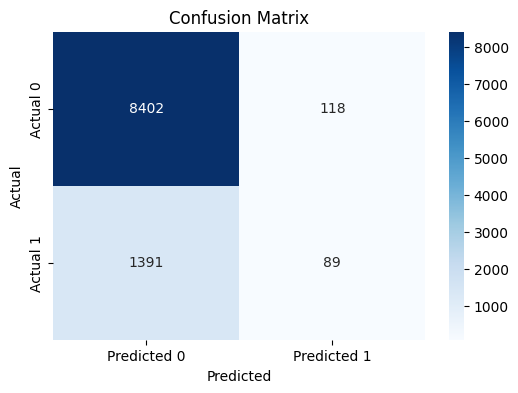

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       num_passengers  sales_channel  trip_type  \
num_passengers               1.000000      -0.002457   0.002261   
sales_channel               -0.002457       1.000000   0.021237   
trip_type                    0.002261       0.021237   1.000000   
purchase_lead                0.212606      -0.013399  -0.008443   
length_of_stay              -0.115850      -0.060352   0.006510   
flight_hour                  0.015607       0.022375  -0.002758   
flight_day                   0.015407       0.042095  -0.001381   
wants_extra_baggage          0.120404      -0.054254  -0.014078   
wants_preferred_seat         0.028544       0.032943   0.005668   
wants_in_flight_meals        0.022943      -0.022235   0.011955   
flight_duration             -0.063169      -0.038629  -0.039071   
booking_complete             0.024116      -0.041060   0.027021   

                       purchase_lead  length_of_stay  flight_hour  flight_day  \
num_passengers             

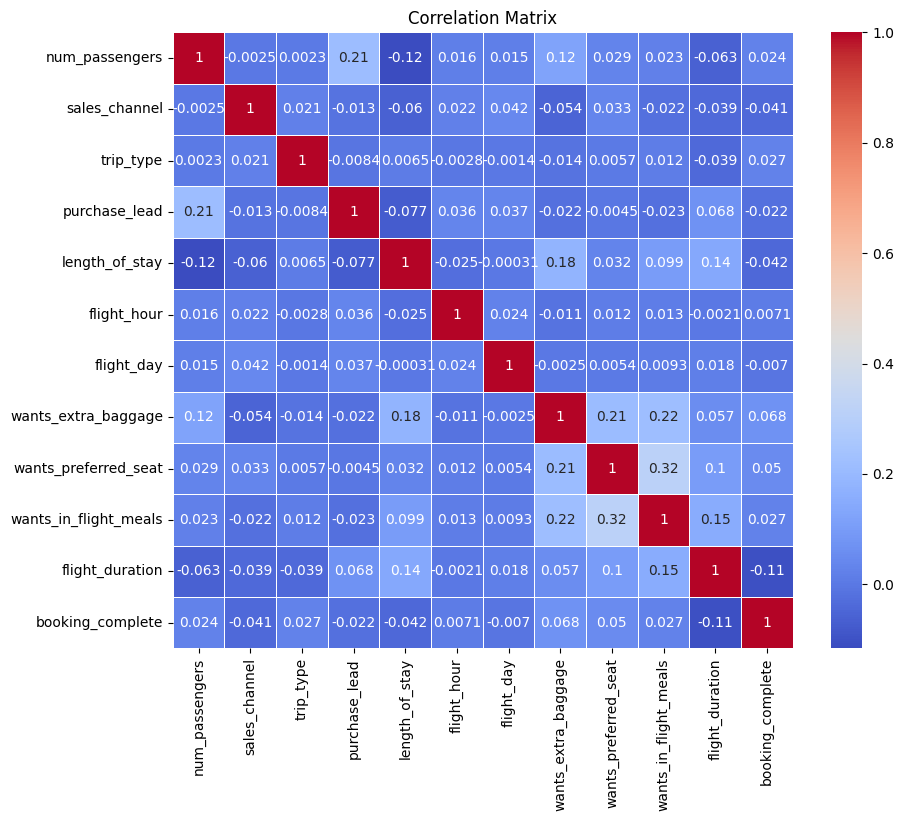

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
target_column = 'booking_complete'

# Sort the correlation matrix based on the target column
sorted_corr_matrix = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

print("Sorted Correlation Matrix with respect to 'feature1':")
print(sorted_corr_matrix)

Sorted Correlation Matrix with respect to 'feature1':
                       booking_complete
booking_complete               1.000000
wants_extra_baggage            0.068139
wants_preferred_seat           0.050116
trip_type                      0.027021
wants_in_flight_meals          0.026511
num_passengers                 0.024116
flight_hour                    0.007127
flight_day                    -0.006986
purchase_lead                 -0.022131
sales_channel                 -0.041060
length_of_stay                -0.042408
flight_duration               -0.106266


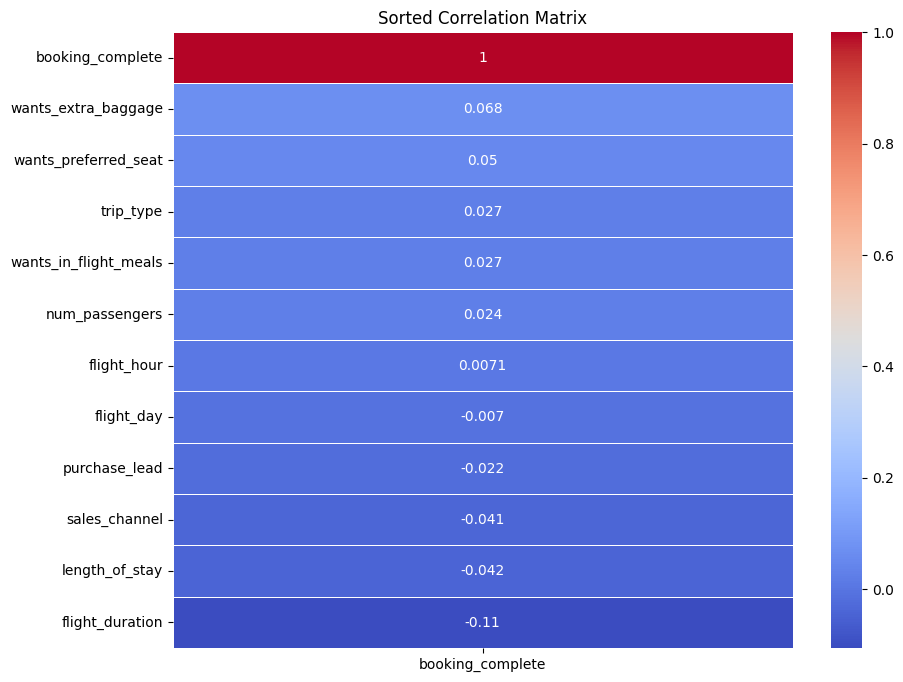

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sorted Correlation Matrix')
plt.show()